In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
import time

In [3]:
start_time = time.time()

sd_sum = 0
runs = 100000
t=1000
step = 1
for i in range(runs):
    position_x = 0
    position_y = 0
    for j in range(t):
        angle = (random.randint(0,359)/180)*np.pi
        position_x+=round(step*np.cos(angle),2)
        position_y+=round(step*np.sin(angle),2)
    sd_sum+=position_x**2+position_y**2
mean_sd = sd_sum/runs

print(f"The Mean Square Displacement is {mean_sd}.")
print(f"Execution Time: {(time.time() - start_time)} seconds.")

The Mean Square Displacement is 999.8212898829913.
Execution Time: 963.7810792922974 seconds.


In [6]:
start_time = time.time()

runs = 10000
t=1000
averages = [0]*10
for i in range(runs):
    position = [0,0]
    values = []
    for j in range(1,t+1):
        angle = (random.randint(0,359)/180)*np.pi
        position[0]+=round(np.cos(angle),2)
        position[1]+=round(np.sin(angle),2)
        if j%100==0:
            values.append(position[0]**2+position[1]**2)
    for j in range(10):
        averages[j]+=values[j]/runs

print(f"The averages are {averages}.")
print(f"Execution Time: {(time.time() - start_time)} seconds.")

The averages are [99.67193910999949, 201.10285323000062, 298.58902693000033, 399.82761215000033, 494.9311487600011, 597.2043227299978, 693.3227494999987, 791.3730152799965, 901.8665181699997, 1003.6801849000012].
Execution Time: 94.43011784553528 seconds.


In [2]:
averages = [99.67193910999949, 201.10285323000062, 298.58902693000033, 399.82761215000033, 494.9311487600011, 597.2043227299978, 693.3227494999987, 791.3730152799965, 901.8665181699997, 1003.6801849000012]

y = 0.999278690573332x+-1.4463427393329766


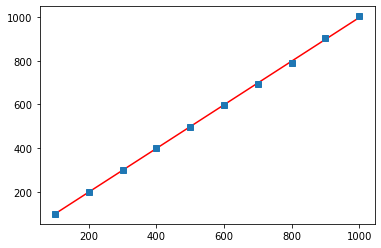

In [3]:
t = np.arange(100,1001,100).reshape(-1,1)
av = np.array(averages)
reg = LinearRegression()
model = reg.fit(t,av)
c = model.intercept_
m = model.coef_[0]
print(f"y = {m}x+{c}")
y = m*t+c
plt.plot(t, y, '-r')
plt.plot(t,av,'s')
plt.show()

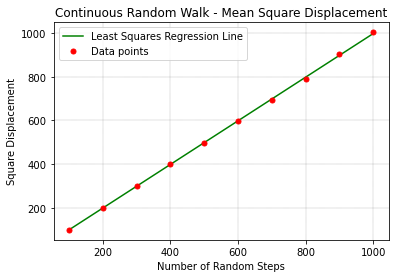

In [4]:
y = m*t+c
plt.plot(t, y, '-',color = 'green', label='Least Squares Regression Line')
plt.plot(t,av,'.',color = 'red',label='Data points',ms=10.0)
plt.legend()
plt.grid(color='0.25', linestyle='--', linewidth=0.2)
plt.ylabel('Square Displacement')
plt.xlabel('Number of Random Steps')
plt.title('Continuous Random Walk - Mean Square Displacement')
plt.savefig('../pdf/figures/CRW_MSD.png')
plt.show()